# Supervised learning introduction, K-Nearest Neighbours (KNN)

Your task will be to predict wine quality from physicochemical features with the help of the 
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will have to do it both as a regression and classification task. 

### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!

In [2]:
# importing used packages/libraries/methods
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Task 1.
### Read data
  - Read the provided winequality-red.csv file. 
  - Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.  
  - Use all columns except the last as features and the quality column as target. 
  - Make 80-20% train test split (use sklearn).
  - Prepare a one-hot encoded version of the y_test and y_train values i.e. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*
  - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test is not available at training time.

In [4]:
# load raw wine data
rawData = pd.read_csv('winequality-red.csv', sep = ';')
# head of the raw data
rawData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# check for missing values
rawData.isna().any().any()

False

In [6]:
# check if dtypes are all numeric
colCount = 0
for i in rawData.columns.values:
    if pd.api.types.is_numeric_dtype(rawData[i]) == True:
        colCount += 1
        print(colCount)
        print('All values are numeric in column: ' + i)

1
All values are numeric in column: fixed acidity
2
All values are numeric in column: volatile acidity
3
All values are numeric in column: citric acid
4
All values are numeric in column: residual sugar
5
All values are numeric in column: chlorides
6
All values are numeric in column: free sulfur dioxide
7
All values are numeric in column: total sulfur dioxide
8
All values are numeric in column: density
9
All values are numeric in column: pH
10
All values are numeric in column: sulphates
11
All values are numeric in column: alcohol
12
All values are numeric in column: quality


## Comments
It seems that there are no missing values and all the values are in numeric form.

In [7]:
# creating features ~ drop last (quality) columns
features = rawData.drop(['quality'], axis = 1)
# head of features
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
# creating target ~ keep last (quality) columns
target = pd.DataFrame(rawData['quality'])
# head of target
target.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [26]:
# split for training and testing (80% - 20%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [31]:
features.shape

(1599, 11)

In [10]:
# one-hot encoding with sklearn
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(target)
# showing working vectors
enc.transform(target).toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [11]:
# normalizing training features
features_train = (features_train - features_train.mean()) / features_train.std()
# normalizing test features
features_test = (features_test - features_test.mean()) / features_test.std()

# Task 2.

### KNN regression
- Implement naive K-nearest neighbours regression as a function only using python and numpy. The signature of the function should be:
```python
def knn_regression(x_test, x_train, y_train, k = 20):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
```
- Use Euclidean distance as a measure of distance.
- Make prediction with k = 20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

In [12]:
# converting pandas DataFrames to numpy arrays
features_train_numpy = features_train.to_numpy()
features_test_numpy = features_test.to_numpy()
target_train_numpy = target_train.to_numpy().T[0]
target_test_numpy = target_test.to_numpy().T[0]

In [13]:
# Euclidean distances between a set of training vectors and a single test vector
def DistEuclidean(x_train_set, x_test_single):
    return np.sqrt(np.array(((x_train_set - x_test_single) ** 2).sum(axis = 1)))

In [14]:
# implementing K nearest neighbour regression (numpy and simple python only)
def knn_regression(x_test, x_train, y_train, k = 20):
    '''Return prediction with knn regression.'''
    
    # container for predictions
    y_pred = []
    # loop over test vectors
    for i in range(x_test.shape[0]):
        # calculated distances from all training vectors
        iDistances = DistEuclidean(x_train, x_test[i])
        
        # get indices of the k closest vectors
        iClosestIndices = iDistances.argsort()[:k]
        
        # get labels of the k closest vectors
        iLabels = y_train[iClosestIndices]
        
        # applying majority voting
        #y_pred.append(np.bincount(iLabels).argmax())
        
        # applying arithmetic mean
        y_pred.append(np.mean(iLabels))
        
    # return predictions
    return np.array(y_pred)

In [15]:
# make predictions with naive K-nearest neighbours regression
y_predNaive = knn_regression(features_test_numpy, features_train_numpy, target_train_numpy)

In [16]:
y_predNaive

array([5.55, 5.3 , 5.6 , 5.65, 5.75, 5.45, 5.  , 5.  , 5.75, 5.9 , 6.55,
       5.45, 5.8 , 5.5 , 5.45, 6.55, 5.35, 5.6 , 6.5 , 5.45, 4.9 , 5.45,
       5.5 , 6.1 , 5.55, 5.55, 6.35, 5.7 , 5.15, 6.25, 5.45, 5.25, 5.55,
       5.15, 5.55, 5.4 , 6.35, 5.85, 5.6 , 6.25, 5.55, 5.25, 6.45, 5.3 ,
       6.1 , 5.75, 6.4 , 5.55, 5.  , 5.65, 5.  , 5.3 , 5.75, 6.4 , 5.1 ,
       5.2 , 6.  , 5.6 , 5.8 , 5.5 , 5.55, 6.1 , 5.2 , 5.3 , 6.55, 5.5 ,
       6.5 , 5.75, 6.7 , 5.25, 6.3 , 5.  , 5.75, 5.95, 6.35, 5.25, 6.45,
       5.55, 5.85, 6.55, 5.45, 6.65, 5.55, 5.4 , 5.9 , 6.05, 5.15, 6.05,
       6.45, 5.4 , 6.05, 5.2 , 5.55, 5.75, 5.4 , 5.45, 5.35, 5.55, 5.1 ,
       6.  , 5.3 , 5.05, 5.7 , 5.2 , 5.6 , 6.15, 5.85, 5.45, 5.5 , 5.4 ,
       6.1 , 5.25, 6.  , 5.  , 5.65, 5.95, 5.95, 5.45, 5.2 , 5.95, 6.4 ,
       5.45, 6.  , 5.2 , 5.6 , 5.7 , 6.2 , 5.5 , 5.45, 5.7 , 5.75, 5.15,
       5.25, 6.5 , 5.65, 4.9 , 5.2 , 5.15, 5.4 , 5.7 , 6.05, 6.2 , 6.4 ,
       5.6 , 6.05, 5.2 , 5.9 , 5.1 , 5.7 , 5.1 , 5.

(array([2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 8 Text major ticklabel objects>)

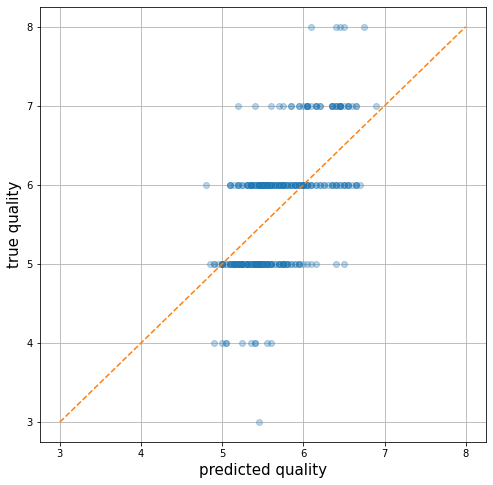

In [14]:
plt.figure(figsize = (8, 8))
scatterSigma = 0.1
plt.plot(y_predNaive, target_test_numpy, 'o', alpha = 0.3)
y_ideal = np.linspace(3, 8, 100)
plt.plot(y_ideal, y_ideal, '--')
plt.grid()
plt.xlabel('predicted quality', size = 15)
plt.ylabel('true quality', size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

# Task 3.


### Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbour that is inversely proportional to the distance.
```python
def knn_weighted_regression(x_test, x_train, y_train, k = 20):
    """Return prediction with weighted knn regression."""
    ...
    return y_pred
```
- Make prediction with k = 20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

In [15]:
# implementing weighted K nearest neighbour regression (numpy and simple python only)
def knn_weighted_regression(x_test, x_train, y_train, k = 20):
    '''Return prediction with knn regression.'''
    
    # container for predictions
    y_pred = []
    # loop over test vectors
    for i in range(x_test.shape[0]):
        # calculated distances from all training vectors
        iDistances = DistEuclidean(x_train, x_test[i])
        
        # get indices of the k closest vectors
        iClosestIndices = iDistances.argsort()[:k]
        
        # get labels of the k closest vectors
        iLabels = y_train[iClosestIndices]
        
        # instead of arithmetic mean we use weighted average with weights inversely proportional to the distance
        y_pred.append(np.average(iLabels, weights = 1 / iDistances[iClosestIndices]))
        
    # return predictions
    return np.array(y_pred)

In [16]:
# make predictions with weighted K-nearest neighbours regression
y_predWeighted = knn_weighted_regression(features_test_numpy, features_train_numpy, target_train_numpy)

(array([2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 8 Text major ticklabel objects>)

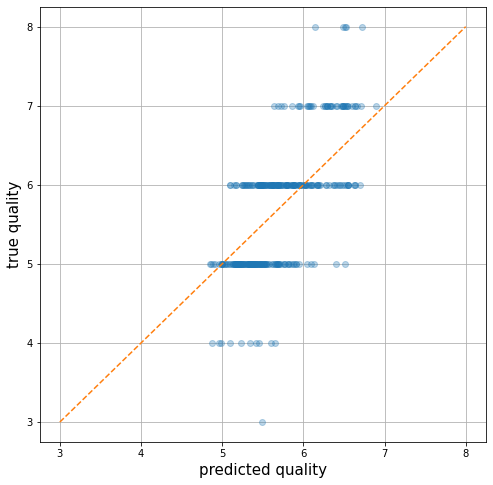

In [17]:
plt.figure(figsize = (8, 8))
scatterSigma = 0.1
plt.plot(y_predWeighted, target_test_numpy, 'o', alpha = 0.3)
y_ideal = np.linspace(3, 8, 100)
plt.plot(y_ideal, y_ideal, '--')
plt.grid()
plt.xlabel('predicted quality', size = 15)
plt.ylabel('true quality', size = 15)
plt.xticks(size = 10)
plt.yticks(size = 10)

# Task 4.
### KNN classification
- Implement the K-nearest neighbours classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
```python
def knn_classifier(x_train,  x_test, y_train, k = 20):
    """Return prediction with knn classification."""
    ...
    return y_pred
```

- Make prediction with k = 20 for the test set using the training data.

In [18]:
# converting training target labels to one-hot encoded form
target_train_onehot = enc.transform(target_train).toarray()

In [19]:
# implementing K nearest neighbour classification (numpy and simple python only)
def knn_classifier(x_test, x_train, y_train, k = 20):
    '''Return prediction with knn classification.'''
    
    # container for predictions
    labels = []
    # loop over test vectors
    for i in range(x_test.shape[0]):
        # calculated distances from all training vectors
        iDistances = DistEuclidean(x_train, x_test[i])
        
        # get indices of the k closest vectors
        iClosestIndices = iDistances.argsort()[:k]
        
        # get labels of the k closest vectors
        iLabels = y_train[iClosestIndices]
        
        # applying majority voting
        labels.append(iLabels.sum(axis = 0).argmax() + 3)
    
    # reshape 
    labels = np.reshape(labels, (x_test.shape[0], 1))
    # return one-hot encoded predictions
    return enc.transform(labels).toarray()

In [20]:
# make predictions with K-nearest neighbours classification
y_predClassifier = knn_classifier(features_test_numpy, features_train_numpy, target_train_onehot)

In [21]:
# sample results
y_predClassifier[:5]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

# Task 5.
### Compare the models
- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. 
You can run it for any model you implented. The predictions should be the same as yours. Some help:
  ```python
  from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
  knn = KNeighborsRegressor(20, weights = "distance")
  #knn = KNeighborsClassifier(20, weights = "uniform")
  knn.fit(X_train, y_train)
  knn.predict(X_test)
  ```
- Write down your observations.

In [18]:
# sklarn K-nearest neighbour
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [20]:
y_predBaseline

6.0

In [19]:
# baseline
y_predBaseline = np.round(target_train_numpy.mean(axis = 0))
print(np.round((y_predBaseline == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with baseline.')

41.25 % of predictions are correct with baseline.


In [24]:
# sklearn uniform regression
knn_r_uniform = KNeighborsRegressor(20, weights = 'uniform')
knn_r_uniform.fit(features_train_numpy, target_train_numpy)
print(np.round((np.round(knn_r_uniform.predict(features_test_numpy), 0) == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with baseline.')

55.94 % of predictions are correct with baseline.


In [22]:
# sklearn weighted regression
knn_r_weighted = KNeighborsRegressor(20, weights = 'distance')
knn_r_weighted.fit(features_train_numpy, target_train_numpy)
print(np.round((np.round(knn_r_weighted.predict(features_test_numpy), 0) == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with baseline.')

58.75 % of predictions are correct with baseline.


In [24]:
# sklearn classification
knn_c = KNeighborsClassifier(20, weights = 'uniform')
knn_c.fit(features_train_numpy, target_train_numpy)
print(np.round((np.round(knn_c.predict(features_test_numpy), 0) == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with baseline.')

54.37 % of predictions are correct with baseline.


In [27]:
# naive regression (rounded)
y_predNaiveRounded = np.round(y_predNaive, 0)
print(np.round((y_predNaiveRounded == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with nainve regression.')

55.94 % of predictions are correct with nainve regression.


In [28]:
# weighted regression (rounded)
y_predWeightedRounded = np.round(y_predWeighted, 0)
print(np.round((y_predWeightedRounded == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with nainve regression.')

58.75 % of predictions are correct with nainve regression.


In [29]:
# classifier
y_predClassifier_label = enc.inverse_transform(y_predClassifier).T[0]
print(np.round((y_predClassifier_label == target_test_numpy).tolist().count(True) / target_test_numpy.shape[0] * 100, 2), '% of predictions are correct with nainve regression.')

54.37 % of predictions are correct with nainve regression.


## Comments
I managed to got the same results with my implementations and that of sklearn.

Generally, the weighted regression gives the best results, the uniform regression and the classification is of the same level of accuracy and the baseline predictions are the worst of the tried methods (luckily).

320